# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
%matplotlib inline

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cooma
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | khanty-mansiysk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | polyarnyy
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | kirakira
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | gaoyou
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | ola
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | keflavik
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 1 | kourou
Processing Record 23 of Set 1 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cooma,-36.2333,149.1333,5.20,75,5,0.61,AU,1730315884
1,atafu village,-8.5421,-172.5159,28.26,69,12,5.14,TK,1730315885
2,waitangi,-43.9535,-176.5597,11.57,83,23,1.79,NZ,1730315886
3,khanty-mansiysk,61.0042,69.0019,0.06,86,40,2.00,RU,1730315888
4,punta arenas,-53.1500,-70.9167,13.06,47,75,10.29,CL,1730315889


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cooma,-36.2333,149.1333,5.20,75,5,0.61,AU,1730315884
1,atafu village,-8.5421,-172.5159,28.26,69,12,5.14,TK,1730315885
2,waitangi,-43.9535,-176.5597,11.57,83,23,1.79,NZ,1730315886
3,khanty-mansiysk,61.0042,69.0019,0.06,86,40,2.00,RU,1730315888
4,punta arenas,-53.1500,-70.9167,13.06,47,75,10.29,CL,1730315889


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

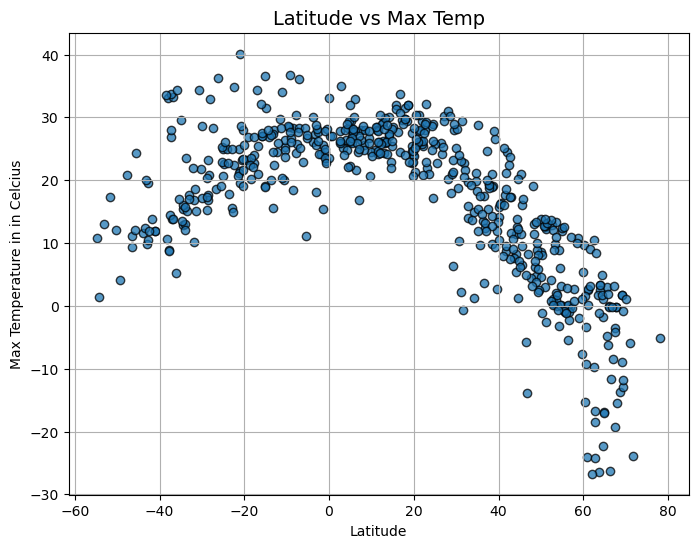

In [16]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

# Incorporate the other graph properties
#to create the scatter
plt.figure(figsize=(8, 6))
plt.title('Latitude vs Max Temp', fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in in Celcius')
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

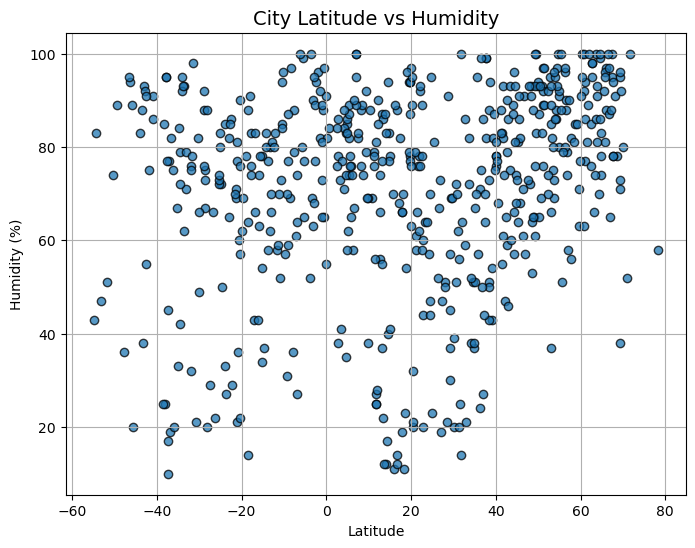

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

# Incorporate the other graph properties
#to create the scatter
plt.figure(figsize=(8, 6))
plt.title('City Latitude vs Humidity', fontsize=14)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

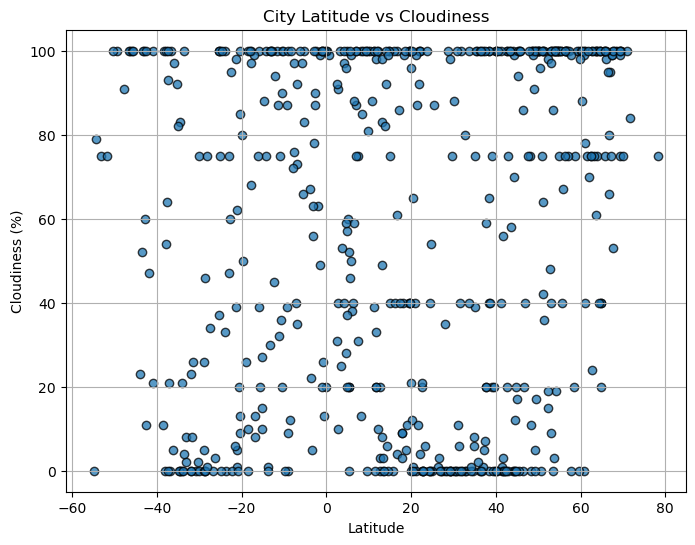

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

# Incorporate the other graph properties
#to create the scatter
plt.figure(figsize=(8, 6))
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

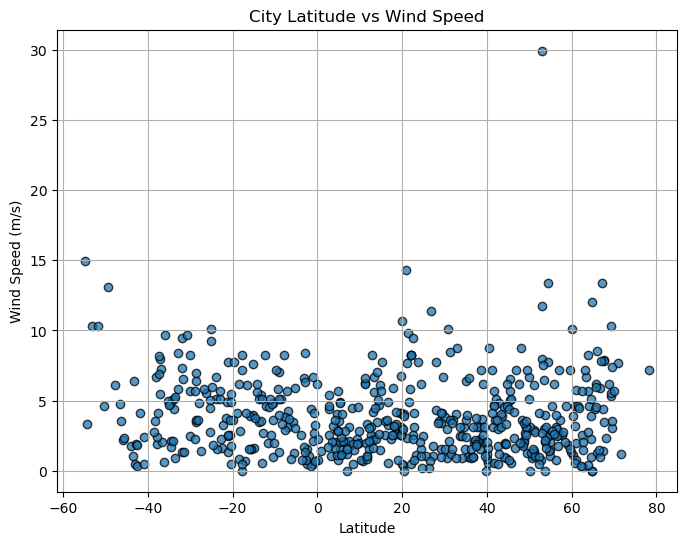

In [22]:
# Build scatter plot for latitude vs. Wind Speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]


#to create the scatter
plt.figure(figsize=(8, 6))
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
    line = slope * x_values + intercept

    plt.scatter(x_values, y_values)
    plt.plot(x_values, line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r^2-value is: {r_value**2:.5f}")

    # Annotate the plot with the regression equation and R^2 value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}',#\nR² = {r_value**2:.2f}',
                 xy=(0.05, 0.05), xycoords='axes fraction', fontsize=12, color='red')


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,khanty-mansiysk,61.0042,69.0019,0.06,86,40,2.00,RU,1730315888
5,polyarnyy,69.1989,33.4478,1.77,73,100,5.31,RU,1730315687
8,bilibino,68.0546,166.4372,-15.52,91,100,2.36,RU,1730315893
9,gaoyou,32.7858,119.4278,14.00,86,0,4.01,CN,1730315894
13,lata,40.1629,-8.3327,14.17,78,100,0.53,PT,1730315899


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cooma,-36.2333,149.1333,5.20,75,5,0.61,AU,1730315884
1,atafu village,-8.5421,-172.5159,28.26,69,12,5.14,TK,1730315885
2,waitangi,-43.9535,-176.5597,11.57,83,23,1.79,NZ,1730315886
4,punta arenas,-53.1500,-70.9167,13.06,47,75,10.29,CL,1730315889
6,ancud,-41.8697,-73.8203,13.90,75,47,4.10,CL,1730315891


## Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.73173


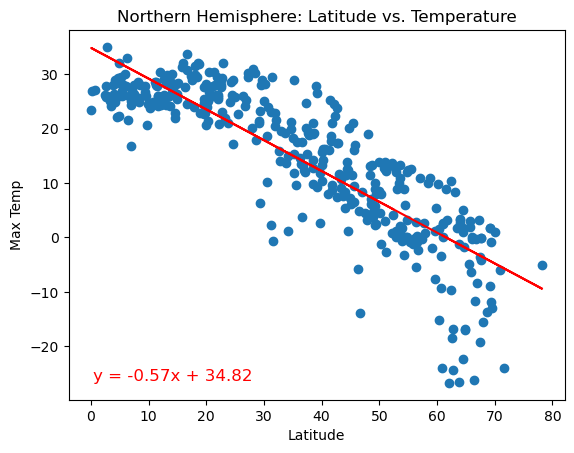

In [94]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temp',
                       'Northern Hemisphere: Latitude vs. Temperature')
plt.savefig("output_data/corr1north.png")
plt.show()

The r^2-value is: 0.30359


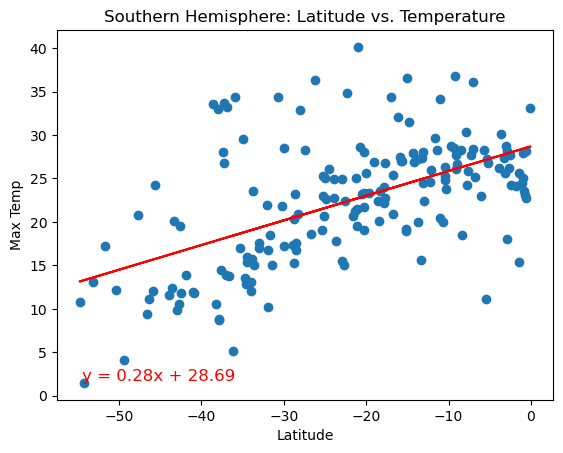

In [96]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temp',
                       'Southern Hemisphere: Latitude vs. Temperature')
plt.savefig("output_data/corr1south.png")
plt.show()

##### Discussion about the linear relationship: 

Northern Hemisphere: Latitude vs. Temperature

From the regression equation in the plot 1 : y = -0.57x +34.82 with the R2 value = 0.73173

It shows a strong negative correlation between latitude and temperature in the Northern Hemisphere, as indicated by the R2 value of 0.73. This means that approximately 73% of the variance in temperature can be explained by latitude. The negative slope (-0.57) suggests that as latitude increases (moving further from the equator toward the poles), the temperature generally decreases. This aligns with the expected climatic pattern, where higher latitudes in the Northern Hemisphere tend to have cooler temperatures.

Southern Hemisphere: Latitude vs. Temperature

From the regression equation in the plot 2 : y = 0.28x + 28.69 with the R2 value = 0.30359

It shows a moderate positive correlation between latitude and temperature, as shown by the R2 value of 0.30. This means that 30% of the variance in temperature can be explained by latitude. The positive slope (0.28) indicates that as latitude increases (moving closer to the equator from the southern latitudes), the temperature also increases. This is consisten with the expected pattern where temperatures are generally warmer closer to the equator.

Further Discussion : Both hemispheres exhibit a clear relationship between latitude and temperature, although the correlation is stronger in the Northern Hemisphere. 

## Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.09083


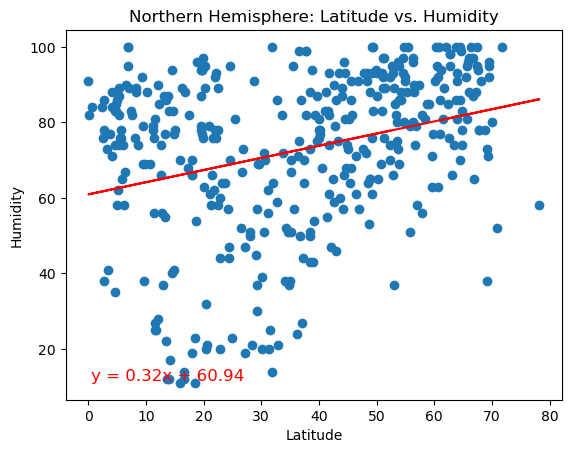

In [100]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Latitude', 'Humidity',
                       'Northern Hemisphere: Latitude vs. Humidity')
plt.savefig("output_data/corr2north.png")
plt.show()

The r^2-value is: 0.02016


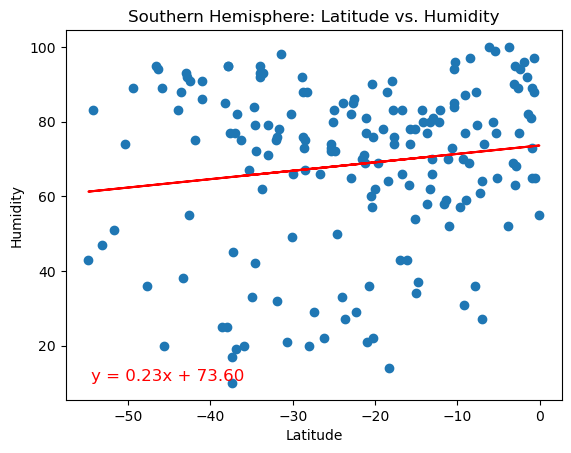

In [102]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Latitude', 'Humidity',
                       'Southern Hemisphere: Latitude vs. Humidity')
plt.savefig("output_data/corr2south.png")
plt.show()

##### Discussion about the linear relationship: 

Northern Hemisphere: Latitude vs. Humidity

From the regression it shows a positive relations with equation in the plot 1 : y = 0.32x + 60.94 and R2 value = 0.09083

R2 value here is also very low (0.09083), meaning only about 9.08% of the variance in humidity can be attributed to latitude in this region of the Northern Hemisphere. This again indicates a weak relationship. The positive slope (0.32) shows a minor increase in humidity as latitude increases, but this correlation is extremely weak and likely not significant.

Southern Hemisphere: Latitude vs. Humidity

From the regression equation in the plot 2 : y = 0.23x + 73.60 and R2 value = 0.02016

Similarly, R2 value is very low (0.02016), meaning only about 2.0% of the variation in humidity can be explained by latitude in this part of the Northern Hemisphere. This indicates a weak relationship. The positive slope (0.23) suggests a slight increase in humidity as latitude approaches the Equator (moving northward), but this trend is very weak and likely not meaningful given the low R2n value.

Further discussion : In both plots, R2 values are close to zero, indicating that latitude does not have a strong predictive relationship with humidity. The R2 values suggest that factors other than latitude are likely more influential in determining humidity levels.

## Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.05211


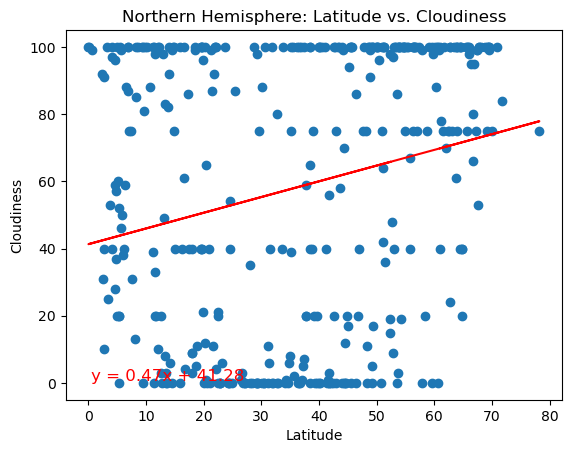

In [106]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness',
                       'Northern Hemisphere: Latitude vs. Cloudiness')
plt.savefig("output_data/corr3north.png")
plt.show()

The r^2-value is: 0.00983


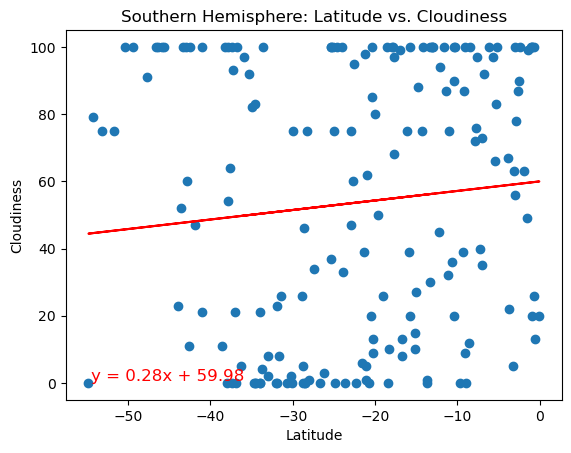

In [108]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness',
                       'Southern Hemisphere: Latitude vs. Cloudiness')
plt.savefig("output_data/corr3south.png")
plt.show()

##### Discussion about the linear relationship:

Northern Hemisphere: Latitude vs. Cloudiness

From the regression equation in the plot 1 : y = 0.47x + 41.28 and R2 value = 0.05211

The R2 value is very low (0.05211), indicating that only about 5.21% of the variation in cloudiness can be explained by latitude in this region of the Northern Hemisphere. This suggests a very weak relationship between latitude and cloudiness. The positive slope (0.47) suggests an increase in cloudiness as latitude increases, but this trend is minimal and not significant given the low R2 value.

Southern Hemisphere: Latitude vs. Cloudiness

From the regression equation in the plot 2 : y = 0.28x + 59.98 and R2 value = 0.00983

The R2 value here is even lower (0.00983), meaning only about 0.98% of the variance in cloudiness can be attributed to latitude in this region of the Northern Hemisphere. This indicates an extremely weak correlation. The positive slope (0.28) again suggests a slight increase in cloudiness with latitude, but the correlation is minimal and likely not meaningful.

Further discussion : The low R2 values suggest that cloudiness is influenced by other factors beyond latitude, such as local weather patterns, geographical features, or seasonal variations.

## Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01903


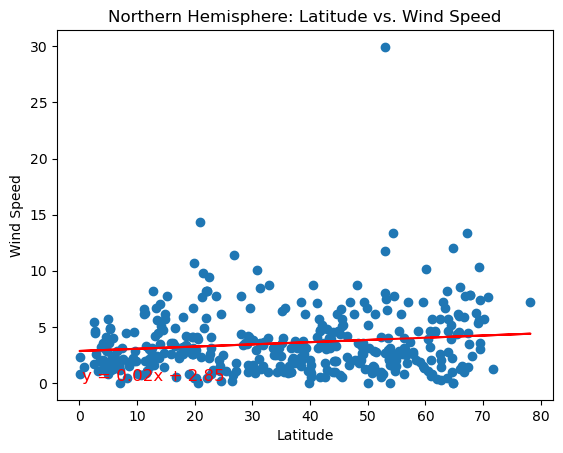

In [112]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed',
                       'Northern Hemisphere: Latitude vs. Wind Speed')
plt.savefig("output_data/corr4north.png")
plt.show()

The r^2-value is: 0.04836


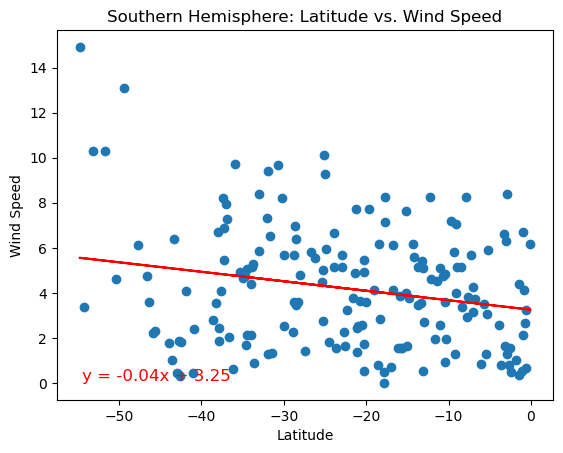

In [114]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed',
                       'Southern Hemisphere: Latitude vs. Wind Speed')
plt.savefig("output_data/corr4south.png")
plt.show()

##### Discussion about the linear relationship:

Northern Hemisphere: Latitude vs. Wind Speed

From the regression equation in the plot 1 : y = 0.02x + 2.85 and R2 value = 0.01903

The R2 value is extremely low (0.01903), meaning only about 1.90% of the variance in wind speed can be explained by latitude in this part of the Northern Hemisphere. This suggests no meaningful relationship between latitude and wind speed. The slope is close to zero (0.02), indicating almost no change in wind speed with latitude in this region. The data points are widely scattered around the regression line, reflecting a lack of correlation.

Southern Hemisphere: Latitude vs. Wind Speed

From the regression equation in the plot 2 : y = -0.04x + 3.25 and R2 value = 0.04836

The R2 value here is also very low (0.04836), indicating that only about 4.8% of the variance in wind speed can be explained by latitude in this region of the Southern Hemisphere. This suggests a weak relationship. The negative slope (-0.04) indicates a slight decrease in wind speed as latitude decreases (moving further from the equator). However, given the low R2 value, this trend is not strong.

Further Discussion :
Both plots show very low R2 values, indicating no meaningful correlation between latitude and wind speed in the Northern Hemisphere based on these plots. This implies that latitude alone is not a good predictor of wind speed in this region.